In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [36]:
df=pd.read_csv('data_science_job.csv')

In [37]:
df.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11.0,NaN,NaN,24.0,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5.0,50-99,Funded Startup,24.0,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,<10,Pvt Ltd,18.0,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,46.0,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17.0,10000+,Pvt Ltd,123.0,0.0


In [38]:
df.shape

(19158, 13)

In [39]:
# when we apply cca for missing value ,
# one thing make sure missing value percentage must be less than 5%

df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [40]:
# we can perform cca on these columns
# city_development_index ,enrolled_university, education_level,experience ,training_hours

In [41]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [42]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
18439,0.878,no_enrollment,Graduate,16.0,100.0
2164,0.624,Full time course,Graduate,20.0,47.0
11996,0.924,no_enrollment,Graduate,20.0,21.0
18299,0.920,Full time course,Masters,20.0,29.0
15384,0.920,no_enrollment,Graduate,20.0,77.0


In [52]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

<Axes: >

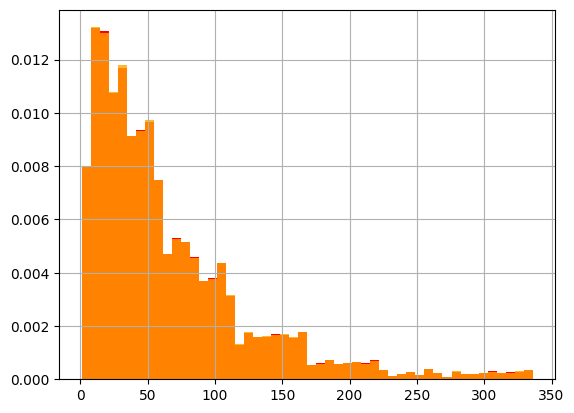

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='orange', density=True, alpha=0.8)

<Axes: ylabel='Density'>

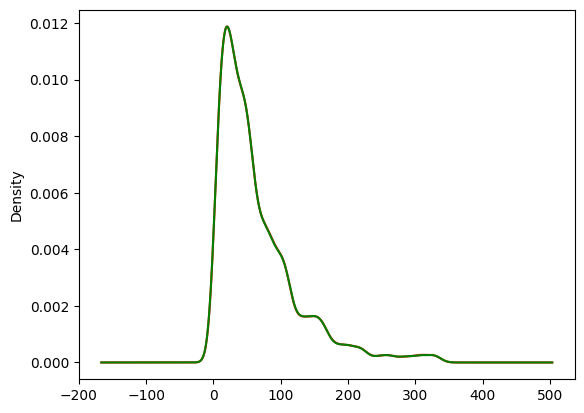

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='green')

In [ ]:
# these graphs shows the distribution of data is same as privous so we can remove entire those columns where nan value is present


 these graphs shows the distribution of data is same as privous so we can remove entire those columns where nan value is present and less than 5%


In [55]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [57]:
new_df.isnull().sum()

city_development_index    0
enrolled_university       0
education_level           0
experience                0
training_hours            0
dtype: int64

In [58]:
Final_df= df.dropna(subset=['city_development_index', 'enrolled_university','education_level','experience','training_hours'])

In [60]:
Final_df.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0


In [61]:
Final_df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    3873
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline          2153
experience                   0
company_size              5118
company_type              5292
training_hours               0
target                       0
dtype: int64